Question 8 -

Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
# Download the JSON data from the provided link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception if the request was unsuccessful
    data = response.json()
except requests.exceptions.RequestException as e:
    print("Error occurred while downloading the data:", e)
    exit(1)


In [3]:
# Extract the episodes data
episodes = data["_embedded"]["episodes"]


In [4]:
# Convert the episodes data into a pandas DataFrame
df = pd.DataFrame(episodes)


In [5]:
df

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,{'average': 8.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard tries to cope with what he did unde...,{'self': {'href': 'https://api.tvmaze.com/epis...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,{'average': 8.5},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [6]:
# Convert the airdate column to datetime format
df['airdate'] = pd.to_datetime(df['airdate'], errors='coerce')

In [8]:
df['rating']

0     8.0
1     7.7
2     7.6
3     7.9
4     8.0
5     8.0
6     8.6
7     7.9
8     8.5
9     8.7
10    7.8
11    7.7
12    7.7
13    8.0
14    7.6
15    7.7
16    7.9
17    8.7
18    8.4
19    8.5
20    8.0
21    7.8
22    7.8
23    8.0
24    7.9
25    7.5
26    7.5
27    7.7
28    7.1
29    7.4
30    7.6
31    7.7
32    7.8
33    7.5
34    7.7
35    7.5
Name: rating, dtype: float64

In [11]:
# Fill missing values with the mean rating across all seasons
mean_rating = df['rating']

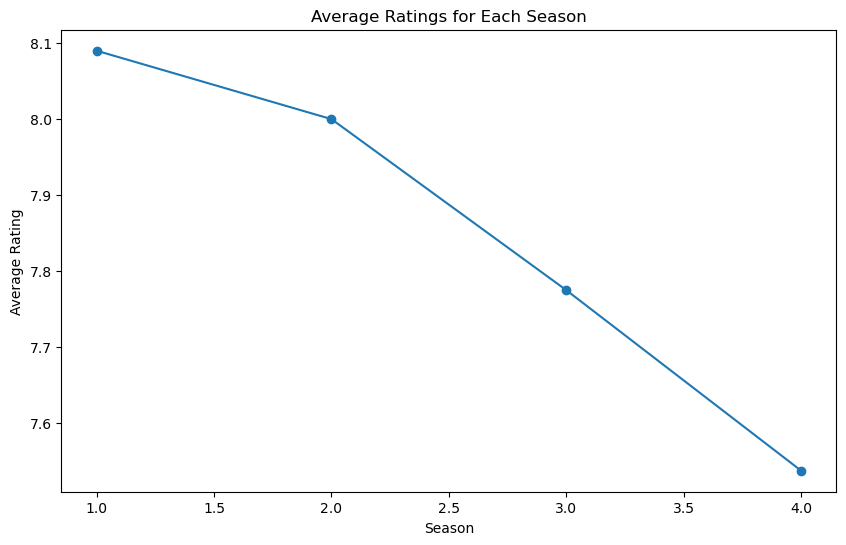

In [13]:
# 1. Plot the ratings for each season
season_ratings = df.groupby('season')['rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(season_ratings.index, season_ratings.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()



In [15]:
##Get all the episode names, whose average rating is more than 8 for every season#
# Extract the 'average' value from the 'rating' dictionary
df['rating'] = df['rating'].apply(lambda x: x['average'] if isinstance(x, dict) else x)

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the average rating for each season
season_avg_ratings = df.groupby('season')['rating'].mean()

# Filter episodes with average rating > 8 for every season
filtered_episodes = df[df['season'].map(season_avg_ratings) > 8]['name']



## Get all the episode names that aired before May 2019
episodes_before_2019 = df[df['airdate'] < '2019-05-01']['name']

## Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('season')['rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['rating'].idxmin()
highest_rated_episodes_names = df.loc[highest_rated_episodes]['name']
lowest_rated_episodes_names = df.loc[lowest_rated_episodes]['name']

## Get the summary for the most popular (highest-rated) episode in every season
most_popular_episodes_summary = df.loc[highest_rated_episodes][['season', 'name', 'summary']]

In [16]:
##Print all the details

print("All the episode names, whose average rating is more than 8 for every season:")
print(filtered_episodes)
print("\nThe episode names that aired before May 2019:")
print(episodes_before_2019)
print("\nThe episode name from each season with the highest rating")
print(highest_rated_episodes_names)
print("\nThe episode name from each season with the lowest rating")
print(lowest_rated_episodes_names)
print("\nSummary for the most popular (highest-rated) episode in every season")
print(most_popular_episodes_summary)


All the episode names, whose average rating is more than 8 for every season:
0                 The Original
1                     Chestnut
2                    The Stray
3            Dissonance Theory
4                  Contrapasso
5                The Adversary
6                Trompe L'Oeil
7                  Trace Decay
8    The Well-Tempered Clavier
9           The Bicameral Mind
Name: name, dtype: object

The episode names that aired before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorc